# How models make predictions

Which classifiers make predictions based on the sign (positive or negative) of the raw model output?

- Both logistic regression and Linear SVMs

# Changing the model coefficients

When you call fit with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with `fit`), and visualize the resulting classifiers.

In [1]:
# # Set the coefficients
# model.coef_ = np.array([[-1,1]])
# model.intercept_ = np.array([-3])

# # Plot the data and decision boundary
# plot_classifier(X,y,model)

# # Print the number of errors
# num_err = np.sum(y != model.predict(X))
# print("Number of errors:", num_err)

# The 0-1 loss

In the figure below, what is the 0-1 loss (number of classification errors) of the classifier?

<center><img src="images/02.02.png"  style="width: 400px, height: 300px;"/></center>


- 2

# Minimizing a loss function

In this exercise you'll implement linear regression "from scratch" using `scipy.optimize.minimize`

In [5]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
X, y = newsgroups.data, newsgroups.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# from sklearn.linear_model import LinearRegression
# from scipy.optimize import minimize
# # The squared error, summed over training examples
# def my_loss(w):
#     s = 0
#     for i in range(y.size):
#         # Get the true and predicted target values for example 'i'
#         y_i_true = y[i]
#         y_i_pred = w@X[i]
#         s = s + (y_i_true - y_i_pred)**2
#     return s

# # Returns the w that makes my_loss(w) smallest
# w_fit = minimize(my_loss, X[0]).x
# print(w_fit)

# # Compare with scikit-learn's LinearRegression coefficients
# lr = LinearRegression(fit_intercept=False).fit(X,y)
# print(lr.coef_)

# Classification loss functions

Which of the four loss functions makes sense for classification?

<center><img src="images/02.03.png"  style="width: 400px, height: 300px;"/></center>


- 2

# Comparing the logistic and hinge losses

In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.

<center><img src="images/02.04.png"  style="width: 400px, height: 300px;"/></center>


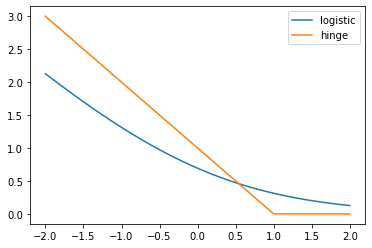

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

# Implementing logistic regression

This is very similar to the earlier exercise where you implemented linear regression "from scratch" using `scipy.optimize.minimize`. However, this time we'll minimize the logistic loss and compare with scikit-learn's `LogisticRegression`

In [9]:
# from sklearn.linear_model import LogisticRegression
# from scipy.optimize import minimize
# # The logistic loss, summed over training examples
# def my_loss(w):
#     s = 0
#     for i in range(X.shape[0]):
#         raw_model_output = w@X[i]
#         s = s + log_loss(raw_model_output * y[i])
#     return s

# # Returns the w that makes my_loss(w) smallest
# w_fit = minimize(my_loss, X[0]).x
# print(w_fit)

# # Compare with scikit-learn's LogisticRegression
# lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
# print(lr.coef_)